In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import time

In [3]:
ser = Service('./pandas/chromedriver/chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [4]:
url = 'https://www.instagram.com/'
driver.get(url)
time.sleep(3)

In [6]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/'+ word
    
    return(url)

In [11]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)
time.sleep(5)

In [40]:
from selenium.webdriver.common.by import By

def select_first(driver):
    # first = driver.find_element_by_css_selector('div._9AhH0')
    first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
    first.click()
    time.sleep(3)

select_first(driver)

In [53]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

<html class="js logged-in client-root js-focus-visible sDN5V" lang="ko" style="--desktop-nav-height:60px;"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>#제주도맛집 해시태그 • Instagram 사진 및 동영상</title>
<meta content="noimageindex, noarchive" name="robots"/>
<meta content="default" name="apple-mobile-web-app-status-bar-style"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover" id="viewport" name="viewport"/>
<link href="/data/manifest.json" rel="manifest"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/es6/ConsumerUICommons.css/b3fdee5bd8e2.css" rel="preload" type="text/css"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/es6/Consumer.css/13f5b6196ff4.css" rel="preload" type="text/css"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/es6/TagPageCont

In [54]:
# import unicodedata

content = soup.select('div.C4VMK > span')[0].text
# content = unicodedata.normalize('NFC', content)

content

'(광고)인스타 광고 전문업체 플랜비컴퍼니입니다.현재 수백개의 업체 인스타 광고를 통한 매출향상!매장홍보, 오픈, 신메뉴 출시 등하루 1~5만 저렴한 가격으로 인스타 인기게시물로 홍보하세요.*아무리 맛있고, 좋은 제품, 이쁜카페가 있어도, 노출이되지 않고 사람들에게 알려지지 않으면 소용없습니다. 노출이 가장중요합니다.상담문의 010 5901 1470#연남동맛집 #제주도맛집 #중문맛집 #제주공항맛집 #제주공항근처맛집 #서귀포맛집 #연남동카페 #홍대맛집 #홍대카페 #경주맛집 #서면맛집 #전포동맛집 #부산맛집 #강남맛집 #인천맛집 #대구맛집 #동성로맛집 #이태원맛집 #포항맛집 #여수맛집 #속초맛집 #강릉맛집 #홍대입구역맛집 #제주흑돼지맛집 #부평맛집 #부천맛집 #기장맛집'

In [66]:
import re
import unicodedata

In [55]:
import re

tags = re.findall(r'#[^\s#,\\]+', content)
# tags = re.findall(r'#\w+', content)
tags

['#연남동맛집',
 '#제주도맛집',
 '#중문맛집',
 '#제주공항맛집',
 '#제주공항근처맛집',
 '#서귀포맛집',
 '#연남동카페',
 '#홍대맛집',
 '#홍대카페',
 '#경주맛집',
 '#서면맛집',
 '#전포동맛집',
 '#부산맛집',
 '#강남맛집',
 '#인천맛집',
 '#대구맛집',
 '#동성로맛집',
 '#이태원맛집',
 '#포항맛집',
 '#여수맛집',
 '#속초맛집',
 '#강릉맛집',
 '#홍대입구역맛집',
 '#제주흑돼지맛집',
 '#부평맛집',
 '#부천맛집',
 '#기장맛집']

In [56]:
date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
date

'2022-01-15'

In [60]:
like = soup.select('div.Nm9Fw > a > span')[0].text
like

'281'

In [61]:
like = soup.select('a.zV_Nj > span')[0].text
like

'281'

In [65]:
place = soup.select('a.O4GlU')
place = unicodedata.normalize('NFC', content)
place

[]

In [ ]:
def get_content():
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '
    
    

In [74]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '
    try:
        tags = re.findall(r'#[^\s#,\\]+', content)
    except:
        tags = ''
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    try:    
        like = soup.select('a.zV_Nj > span')[0].text
    except:
        like = 0
    try:    
        place = soup.select('a.O4GlU')
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    
    data = [content, date, like, place, tags]
    
    return(data)

In [73]:
place = soup.select('a.O4GlU')
place

[]

In [76]:
my_list = get_content(driver)
my_list

['<광고>#제주분식\xa0https://jejubunsig.modoo.at/\xa0📌제주시 귀아랑길 23 (제주공항 5(협찬)안녕하세요 제주분식입니다.* 제주분식은 제주산 식자재를 사용하여 안전하고 건강한 먹거리를 추구하는 제주산 로컬푸드 분식카페입니다.*제주공항에서 차로 5분거리에위치하고있어서 제주를 찾는 여행객분들이나 여행중이신분들에게 빠르고 간편한 식사와 포장메뉴를 제공합니다.* 주요메뉴- 모당모당 = 모당준다라는 제주도 사투리로써 제주분식의 모듬분식을 표현하는 제주분식만의 시그니처메뉴입니다.참고로 모당모당에는 떡볶이,순대,튀김,면사리가 함께들어갑니다.- 돔베라면, 매운돔베라면(돔베란? 갓삶은 돼지고기를 나무도마에 얹어 덩어리째 썰어 먹는 제주도 향토지역음식입니다.)생면과 제주돔베고기의 진한육수가 어우러지는 메뉴입니다.- 돔베김밥제주돔베고기를 듬뿍넣은 제주분식만의 메뉴입니다.\xa0 - 전복김밥 = 매일아침 신선한 전복을 구매하여 정성껏손질후 볶은후 싱싱한 김밥을 만들고있습니다.- 제주해물라면 = 싱싱한 여러 가지해산물이 들어있고 특별한육수맛이 생면과 어울리는 제주분식만의 메뉴\xa0\xa0 * 제주 로컬푸드 분식카페 제주분식.\xa0064-726-2120주소 - 제주시 귀아랑길 23 (제주공항 5분거리), 영업시간은 10:00부터~16:00까지입니다.\xa0 * 제주분식을 좋아해주시는분들은 10대~20대 SNS를 좋아하시는 여성분들과 커플분들이며, 그리고 어린이를 동반한가족고객분들 그외 2~3대 대가족여행을 함께다니는 가족분들이 많이 찾고계십니다.\xa0제주여행중 꼭 들려야하는 분식 맛집 알려줌‼제주 로컬푸드로 만든 분식카페 공항근처 #제주분식 ⠀간편하게 먹기 좋은 메뉴들로 여행객들이 꼭 찾는 곳!싱싱한 제주 식자재로 만들어 안전,건강한 먹거리뿐맛있는거 싹 모은 모듬분식 #모당모당 과 #돔베라면돔베김밥,전복김밥,해물라면도 믿먹템👍🏻👍🏻비줠도 좋아서 커플들, 가족여행객들도 많이 찾는다공⠀⠀📌제주시 귀아랑길 23 (제주공항 5분거리)📌매일 10:00 - 

In [89]:
def move_next(driver):
    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)

move_next(driver)

In [101]:
def clowling_insta(driver):
    
    data_total = []
    
    for driver in range[5]:
        try:
            get_content(driver)
            data_total.append(data)
        
            move_next(driver)
        except:
            time.sleep(3)
            move_next(driver)
    
    return(data_total)

clowling_insta(driver)
# 아잇 싯팔;;

TypeError: 'type' object is not subscriptable

In [107]:
# driver = webdriver.Chrome(service = ser)

# url = 'https://www.instagram.com/'
# driver.get(url)
# time.sleep(3)

def insta_crowling(word, n):
    url = insta_searching(word)
    
    driver.get(url)
    time.sleep(5)
    
    select_first(driver)
    time.sleep(5)
    
    result = []
    
    for i in range(n):
        try:
            data = get_content(driver)
            result.append(data)
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)
    return(result)

In [108]:
result_1 = insta_crowling('제주도맛집', 20)

result_1

[['<광고>온가족이 즐길 수 있는 제주갈비국수!!💕✔손소독제 항시 배치(입장시 입구부터 손소독제 마스크 착용후 입장 가능합니다🥰)▪️오픈시간: 07:30 - 17:00▪️전화: 064-782-5105▪️제주시 구좌읍 해맞이해안로 2284▪️매주 화요일 휴무산도롱맨도롱#제주맛집 #제주도맛집 #제주아쿠아플라넷#표선맛집 #성산맛집 #성산일출봉맛집 #구좌읍맛집 #구좌맛집 #비자림맛집 #안돌오름 #광치기해변맛집 #제주고기국수#제주도고기국수 #성산아침식사',
  '2022-01-16',
  0,
  '',
  ['#제주맛집',
   '#제주도맛집',
   '#제주아쿠아플라넷',
   '#표선맛집',
   '#성산맛집',
   '#성산일출봉맛집',
   '#구좌읍맛집',
   '#구좌맛집',
   '#비자림맛집',
   '#안돌오름',
   '#광치기해변맛집',
   '#제주고기국수',
   '#제주도고기국수',
   '#성산아침식사']],
 ['(광고)\u2063여행선물 고민하지마세요! 특별하고 맛있는 제주선물!!제주여행 기념품\u2063<제주인 황제건어물 2호점>!!\u2063@jeju_in.hwangje_geoneomul\u2063\u2063판매메뉴: 당일바리오징어, 도톰한쥐포, 귀한한치, 부드러운아귀포, 즉석구이김 등 맛있는게 너무 많아 고민된다면!!황제건어물에서만 살 수 있는 #제주에서너에게 선물세트\u20631. 너에게 1번 세트\u2063대구껍질, 아귀통, 귀채, 국산망족\u20632.너에게 2번세트\u2063도톰쥐포, 살포구이,대구껍질, 통통구이\u20633.너에게 3번세트꼬리아귀, 장족,페스츄리, 쥐포구이채4.너에게 4번세트볶음새우, 볶음멸치, 진미채, 북어채1시간전 예약시 공항까지 "배달 가능 🛫"\u2063\u2063*전국 택배가능*🐙제주인황제건어물 2호점\u2063제주시 우정로 60 1층\u2063(제주공항15분)010-4029-2989\u2063#제주도맛집 #제주도카페 #제주여행 #제주도여행#제주가볼만한곳 #제주살이 #제주핫플레이스#제주핫플 #제주

In [111]:
result_df = pd.DataFrame(result_1)
result_df.columns = ['content', 'date', 'like', 'place', 'tags']

result_df.head()

,content,date,like,place,tags
0,<광고>온가족이 즐길 수 있는 제주갈비국수!!💕✔손소독제 항시 배치(입장시 입구부터...,2022-01-16,0,,"[#제주맛집, #제주도맛집, #제주아쿠아플라넷, #표선맛집, #성산맛집, #성산일출..."
1,(광고)⁣여행선물 고민하지마세요! 특별하고 맛있는 제주선물!!제주여행 기념품⁣<제주...,2022-01-14,0,,"[#제주에서너에게, #제주도맛집, #제주도카페, #제주여행, #제주도여행, #제주가..."
2,".❤애월 ""사이카레""❤오션뷰 바라보면서 혼밥카레도🌅너~무 분위기있다ㅠㅠ 카레도 왠지...",2022-01-14,"1,156",,"[#제주맛집, #제주도맛집, #제주공항근처맛집, #제주시맛집, #애월맛집, #중문맛..."
3,.⠀푸릇푸릇한 감귤나무 밭 한가운데그 곳에서 지글지글 흑돼지를 굽고 있어요.⠀#월정...,2022-01-17,206,,[#월정리갈비밥]
4,(광고)인스타 광고 전문업체 플랜비컴퍼니입니다.현재 수백개의 업체 인스타 광고를 통...,2022-01-15,291,,"[#연남동맛집, #제주도맛집, #중문맛집, #제주공항맛집, #제주공항근처맛집, #서..."


In [129]:
jeju_insta_df = pd.DataFrame()

f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx',
          '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']

for fname in f_list:
    fpath = './pandas/5_Jeju_Hotplace/files/' + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

In [130]:
jeju_insta_df.shape

(12780, 5)

In [131]:
jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True)
jeju_insta_df.shape

(8369, 5)

In [132]:
jeju_insta_df.to_excel('./pandas/5_Jeju_Hotplace/1_crawling_raw.xlsx', index = False)

In [133]:
raw_total = jeju_insta_df.copy()

In [149]:
raw_total.columns
raw_total['tags']

0       ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1       ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2       ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
3       ['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛...
4                                                      []
                              ...                        
1702    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
1703    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
1705                           ['#사진좀찍으시는님덕에건져또', '#이순간']
1706                                                   []
1707                            ['#HappyNewYearEveryone']
Name: tags, Length: 8369, dtype: object

In [155]:
tags_total = []

# raw_total['tags'][2:-2]

# for tags in raw_total['tags']:
#     tags_list = tags[2:-2].split("', '")
#     for tag in tags_list:
#         tags_total.append(tag)

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)        

# raw_total['tags']
# raw_total['tags'][1].str[2:-2]

In [156]:
from collections import Counter
tag_counts = Counter(tags_total)


pd.Series(tags)

0    ['#HappyNewYearEveryone']
dtype: object

In [157]:
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [166]:
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔','#제주눈썹문신','#서귀포눈썹문신','#눈썹문신',
            '#제주속눈썹','#제주남자눈썹문신','#서귀포자연눈썹','#서귀포남자눈썹문신',
            '#서귀포반영구','#제주메이크업','#제주반영구']

tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)

tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#먹스타그램', 395),
 ('#서귀포속눈썹', 395),
 ('#카멜리아힐', 379),
 ('#중문흑돼지맛집', 377),
 ('#애월맛집', 373),
 ('#daily', 360),
 ('#가족여행', 356),
 ('#제주도여행코스', 350),
 ('#jejuisland', 343),
 ('#성산맛집', 316)]

In [160]:
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
import seaborn as sns


rc('font', family = 'malgun gothic')

In [178]:
tag_count_df = pd.DataFrame(tag_counts_selected.most_common(50))
tag_count_df.columns = ['tags', 'counts']
tag_count_df.head()

## blank 지우기
tag_count_df['tags'].replace('', None, inplace = True)
tag_count_df['tags']
tag_count_df.dropna(subset = ['tags'], inplace = True)

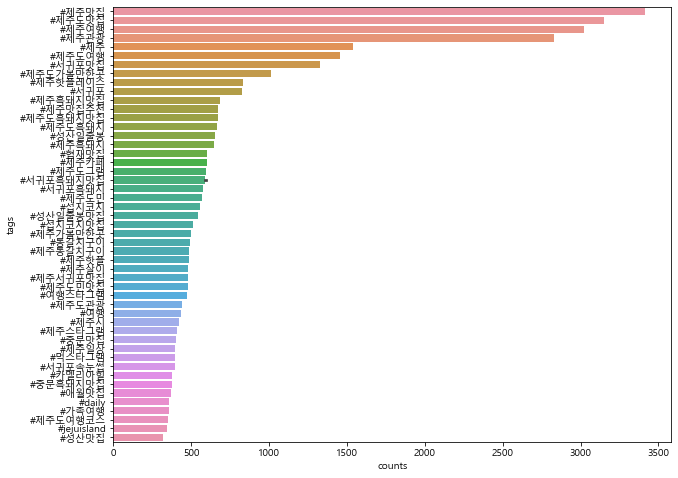

In [179]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags',
           data = tag_count_df)
plt.show()

In [2]:
! pip install wordcloud==1.4.1

  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\kth96\\AppData\\Local\\Temp\\pip-install-3ovz8f13\\wordcloud_8152020f94fb45e08a6cdde2cebf99b0\\setup.py'"'"'; __file__='"'"'C:\\Users\\kth96\\AppData\\Local\\Temp\\pip-install-3ovz8f13\\wordcloud_8152020f94fb45e08a6cdde2cebf99b0\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\kth96\AppData\Local\Temp\pip-wheel-rc87s20g'
       cwd: C:\Users\kth96\AppData\Local\Temp\pip-install-3ovz8f13\wordcloud_8152020f94fb45e08a6cdde2cebf99b0\
  Complete output (16 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9

In [181]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [4]:
import pandas as pd

raw_total = pd.read_excel('./pandas/5_Jeju_Hotplace/files/1_crawling_raw.xlsx')
raw_total.shape

(8801, 5)

In [5]:
raw_total['place'].value_counts()

Jeju                    271
Jeju-do                 179
Jungle Book by Alice    108
Seogwipo                 66
제주도 크리스마스 박물관            59
                       ... 
제주마당                      1
형제섬                       1
동복해녀식당                    1
종로 광장시장                   1
디스이즈핫                     1
Name: place, Length: 1028, dtype: int64

In [7]:
location_counts = raw_total['place'].value_counts()
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59


In [9]:
locations = list(location_counts_df.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '할로비치',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '고집돌우럭중문점',
 '석부작박물관',
 '제주도 애월읍',
 '알뜨르 비행장',
 '카멜리아 힐',
 '제주레포츠랜드',
 '밥깡패',
 '제주 함덕 서우봉 해변',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '위미동백나무군락지',
 '제주신화월드 Jeju Shinhwa World',
 'Woljeongri Beach',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '고래배꼽',
 '제주 성산 신산포구자연산횟집 회포장',
 '새별오름',
 '용머리해안',
 '용눈이오름',
 '캔디원',
 '사려니숲길',
 '하이엔드 제주',
 '제주빅볼랜드',
 '서귀포 느영나영 게스트하우스',
 '휴애리 자연생활공원',
 '옹포리',
 '삼무공원',
 '마마뜰',
 '제주어린왕자게스트하우스',
 '위미동백나무군락',
 '제주커피박물관 Baum',
 'Jeju Aewol',
 '한라산',
 '위미2리 동백군락지',
 'Jeju Island 제주특별자치도 济州道',
 '광치기해변',
 '서우봉',
 '제주해남',
 '한라산 (漢拏山, Hallasan)',
 '카페한라산',
 '성이시돌목장',
 '제주 송악산',
 '옹포별장가든',
 '월정리카페콧수염',
 '牛岛 Udo Island 우도',
 '곽지해수욕장',
 '카페브리프',
 '아줄레주',
 '에코랜드',
 '산굼부리',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 'Terarosa - 테라로사',